In [24]:
!pip install geopy

In [25]:
import pandas as pd
df=pd.read_csv("monroe_county_car_crach.csv",encoding='ISO-8859-1')
df.head()

Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86.579625

In [26]:
#removing duplicates:
df = df.drop_duplicates()

In [27]:
!pip install geopandas

In [28]:
!pip install geodatasets

In [29]:
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [30]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

In [31]:
gdf.head()

Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude                    geometry  
0 -86.525874  POINT (-86.52587 39.15921)  
1 -86.534848  POINT (-86.53485 39.16144)  
2 -86.568890  POINT (-86.56889 39.14978)  
3 -86.575956  POINT (-86.57596 39.16566)  
4 -86.579625  POINT (-86.57962 39.16485)

In [32]:
df["Primary Factor"].isnull().sum()

1119

In [33]:
df["Primary Factor"].dropna()

0        OTHER (DRIVER) - EXPLAIN IN NARRATIVE
1                        FOLLOWING TOO CLOSELY
2                    DISREGARD SIGNAL/REG SIGN
3                FAILURE TO YIELD RIGHT OF WAY
4                FAILURE TO YIELD RIGHT OF WAY
                         ...                  
53938                      IMPROPER LANE USAGE
53939                             UNSAFE SPEED
53940               BRAKE FAILURE OR DEFECTIVE
53941                           UNSAFE BACKING
53942    OTHER (DRIVER) - EXPLAIN IN NARRATIVE
Name: Primary Factor, Length: 52760, dtype: object

In [34]:
df["Primary Factor"].isnull().sum()

1119

In [35]:
df["Primary Factor"].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11186
FOLLOWING TOO CLOSELY                        7350
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6152
UNSAFE BACKING                               5183
RAN OFF ROAD RIGHT                           2922
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1911
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1684
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1498
ROADWAY SURFACE CONDITION                    1259
LEFT OF CENTER                               1077
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           804
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              495
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472
OTHER (ENVIRONMENTAL) - EXPLAIN IN 

In [36]:
df["Primary Factor"].isnull().sum()

1119

In [37]:
# Step 1: Calculate the value counts for "Primary Factor"
primary_factor_counts = df["Primary Factor"].value_counts()

# Step 2: Calculate the percentiles
percentile = (primary_factor_counts / primary_factor_counts.sum()) * 100

# Step 3: Combine the count and percentile into a DataFrame
primary_factor_percentiles = pd.DataFrame({
    'Count': primary_factor_counts,
    'Percentile': percentile
})

# Display the result
print(primary_factor_percentiles)

                                          Count  Percentile
Primary Factor                                             
FAILURE TO YIELD RIGHT OF WAY             11186   21.201668
FOLLOWING TOO CLOSELY                      7350   13.931008
OTHER (DRIVER) - EXPLAIN IN NARRATIVE      6152   11.660349
UNSAFE BACKING                             5183    9.823730
RAN OFF ROAD RIGHT                         2922    5.538287
DISREGARD SIGNAL/REG SIGN                  2206    4.181198
SPEED TOO FAST FOR WEATHER CONDITIONS      1911    3.622062
IMPROPER TURNING                           1843    3.493177
ANIMAL/OBJECT IN ROADWAY                   1684    3.191812
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE   1656    3.138741
UNSAFE SPEED                               1498    2.839272
ROADWAY SURFACE CONDITION                  1259    2.386277
LEFT OF CENTER                             1077    2.041319
IMPROPER LANE USAGE                         985    1.866945
ALCOHOLIC BEVERAGES                     

In [38]:
# Step 1: Calculate the value counts for "Primary Factor"
primary_factor_counts = df["Primary Factor"].value_counts()

# Step 2: Calculate the percentiles
percentile = (primary_factor_counts / primary_factor_counts.sum()) * 100

# Step 3: Combine the count and percentile into a DataFrame
primary_factor_percentiles = pd.DataFrame({
    'Count': primary_factor_counts,
    'Percentile': percentile
})

# Step 4: Calculate the cumulative percentile
primary_factor_percentiles['Cumulative Percentile'] = primary_factor_percentiles['Percentile'].cumsum()

# Step 5: Filter the rows where the cumulative percentile is less than or equal to 90%
filtered_df = primary_factor_percentiles[primary_factor_percentiles['Cumulative Percentile'] <= 90]

# Display the filtered DataFrame
print(filtered_df)

                                          Count  Percentile  \
Primary Factor                                                
FAILURE TO YIELD RIGHT OF WAY             11186   21.201668   
FOLLOWING TOO CLOSELY                      7350   13.931008   
OTHER (DRIVER) - EXPLAIN IN NARRATIVE      6152   11.660349   
UNSAFE BACKING                             5183    9.823730   
RAN OFF ROAD RIGHT                         2922    5.538287   
DISREGARD SIGNAL/REG SIGN                  2206    4.181198   
SPEED TOO FAST FOR WEATHER CONDITIONS      1911    3.622062   
IMPROPER TURNING                           1843    3.493177   
ANIMAL/OBJECT IN ROADWAY                   1684    3.191812   
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE   1656    3.138741   
UNSAFE SPEED                               1498    2.839272   
ROADWAY SURFACE CONDITION                  1259    2.386277   
LEFT OF CENTER                             1077    2.041319   
IMPROPER LANE USAGE                         985    1.86

In [39]:
df["Primary Factor"].count()

52760

In [40]:
# Step 1: Calculate the value counts for "Primary Factor"
primary_factor_counts = df["Primary Factor"].value_counts()

# Step 2: Calculate the percentiles
percentile = (primary_factor_counts / primary_factor_counts.sum()) * 100

# Step 3: Combine the count and percentile into a DataFrame
primary_factor_percentiles = pd.DataFrame({
    'Count': primary_factor_counts,
    'Percentile': percentile
})

# Step 4: Calculate the cumulative percentile
primary_factor_percentiles['Cumulative Percentile'] = primary_factor_percentiles['Percentile'].cumsum()

# Step 5: Identify the primary factors that are within the 90% cumulative percentile
factors_to_keep = primary_factor_percentiles[primary_factor_percentiles['Cumulative Percentile'] <= 90].index

# Step 6: Filter the original DataFrame to keep only these factors
filtered_df = df[df['Primary Factor'].isin(factors_to_keep)]

# Display the filtered DataFrame
print(filtered_df)


       Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0      2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1      2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2      2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3      2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4      2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   
...     ...    ...  ...      ...     ...            ...                 ...   
53937  2003     10    5  Weekday  1800.0          2-Car   No injury/unknown   
53938  2003     10    6  Weekday  1700.0          2-Car   No injury/unknown   
53939  2003     11    3  Weekday   800.0          1-Car   No injury/unknown   
53941  2003     12    1  Weekend   700.0          2-Car   No injury/unknown   
53942  2003     12    7  Weekend  1700.0          2-Car  Non-incapacitating   

                              Primary Factor      R

In [41]:
filtered_df["Primary Factor"].count()

46912

In [42]:
filtered_df.to_csv("DF1.csv")

In [43]:
# Assuming the columns are named 'year', 'month', and 'day'
filtered_df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Display the updated DataFrame
print(filtered_df.head())


   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude       Date  
0 -86.525874 2015-01-05  
1 -86.534848 2015-01-06  
2 

C:\Users\e430335\AppData\Local\Temp\1\ipykernel_1072\2631019833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


In [47]:
filtered_df.head()

Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude       Date  
0 -86.525874 2015-01-05  
1 -86.534848 2015-01-06  
2 -86.568890 2015-01-06  
3 -86.575956 2015-01-07  
4 -86.579625 2015-01-07

In [53]:
filtered_df.Date

0       2015-01-05
1       2015-01-06
2       2015-01-06
3       2015-01-07
4       2015-01-07
           ...    
53937   2003-10-05
53938   2003-10-06
53939   2003-11-03
53941   2003-12-01
53942   2003-12-07
Name: Date, Length: 46912, dtype: datetime64[ns]

In [55]:
filtered_df['month_year'] = df['Date'].dt.to_period('M')  # Convert to period (year-month)
grouped_df = filtered_df.groupby('month_year').count()

KeyError: 'Date'

In [59]:
filtered_df.columns

Index(['Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude', 'Date'],
      dtype='object')

In [61]:
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])  # Convert if necessary

C:\Users\e430335\AppData\Local\Temp\1\ipykernel_1072\3547733826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])  # Convert if necessary


In [63]:
filtered_df['Date'].dtypes


dtype('<M8[ns]')

In [65]:
filtered_df['month_year'] = filtered_df['Date'].dt.to_period('M')  # Convert to period (year-month)
grouped_df = filtered_df.groupby('month_year').count()  # Count occurrences

C:\Users\e430335\AppData\Local\Temp\1\ipykernel_1072\2831341339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month_year'] = filtered_df['Date'].dt.to_period('M')  # Convert to period (year-month)


In [71]:
filtered_df.Year.value_counts()

Year
2008    3783
2015    3781
2004    3741
2012    3731
2003    3671
2014    3667
2010    3605
2007    3559
2013    3532
2005    3490
2009    3478
2011    3462
2006    3412
Name: count, dtype: int64

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
filtered_df.Year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count of Rows')
plt.title('Count of Rows per Year')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [77]:
df["Injury Type"].value_counts()

Injury Type
No injury/unknown     41542
Non-incapacitating    11133
Incapacitating         1089
Fatal                   115
Name: count, dtype: int64

In [105]:
filtered_df.to_csv("DF_date.csv")

In [107]:
filtered_df.Reported_Location.value_counts()

Reported_Location
E 3RD ST               326
W 3RD ST               194
SR37N & VERNAL         177
3RD ST                 161
S WALNUT ST            147
                      ... 
SR37S & WEST 3RD ST      1
SR37W & W 3RD ST         1
37 & W 3RD ST            1
MADISON & THIRD ST       1
MONROW & THIRD ST        1
Name: count, Length: 17331, dtype: int64

In [109]:
df= pd.read_csv("DF_date2.csv")

In [111]:
df.head()

Weekend  Hour Collision Type         Injury Type  \
0  Weekday     0          2-Car   No injury/unknown   
1  Weekday  1500          2-Car   No injury/unknown   
2  Weekend  2300          2-Car  Non-incapacitating   
3  Weekend   900          2-Car  Non-incapacitating   
4  Weekend  1100          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude        Date month_year  
0 -86.525874  2015-01-05    2015-01  
1 -86.534848  2015-01-06    2015-01  
2 -86.568890  2015-01-06    2015-01  
3 -86.575956  2015-01-07    2015-01  
4 -86.579625  2015-01-07    2015-01

In [113]:
df["Primary Factor"].value_counts()

Primary Factor
FAILURE TO YIELD RIGHT OF WAY               11168
FOLLOWING TOO CLOSELY                        7336
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6064
UNSAFE BACKING                               5161
RAN OFF ROAD RIGHT                           2916
DISREGARD SIGNAL/REG SIGN                    2201
SPEED TOO FAST FOR WEATHER CONDITIONS        1907
IMPROPER TURNING                             1835
ANIMAL/OBJECT IN ROADWAY                     1682
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1652
UNSAFE SPEED                                 1491
ROADWAY SURFACE CONDITION                    1250
LEFT OF CENTER                               1070
IMPROPER LANE USAGE                           978
Name: count, dtype: int64

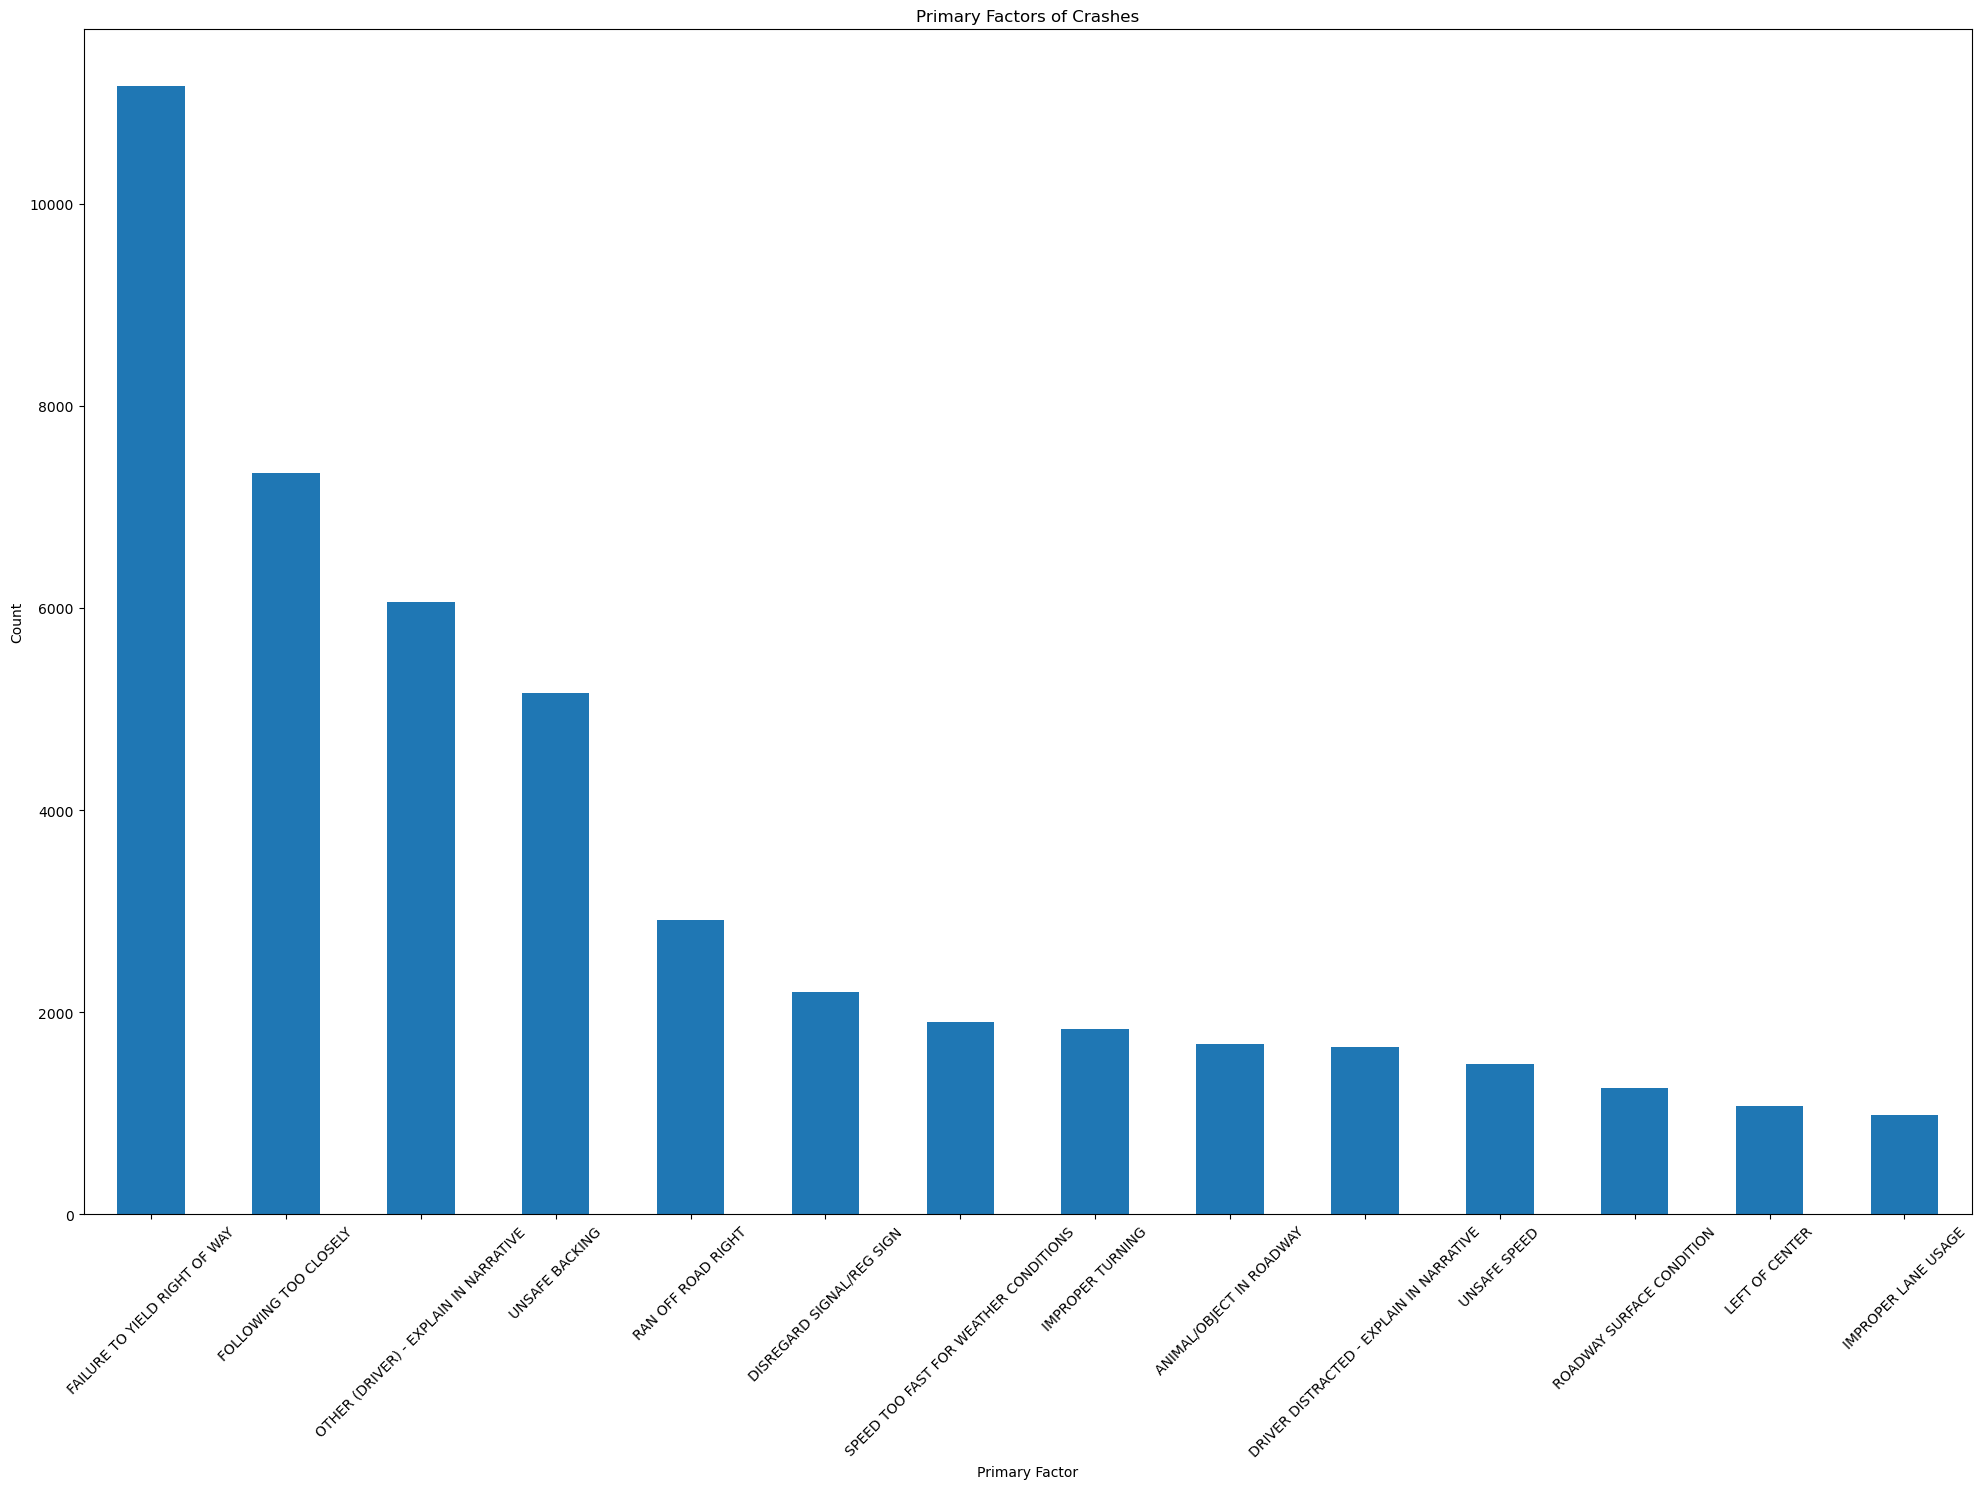

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
df["Primary Factor"].value_counts().plot(kind='bar')
plt.xlabel('Primary Factor')
plt.ylabel('Count')
plt.title('Primary Factors of Crashes')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [123]:
df["Reported_Location"].value_counts()

Reported_Location
E 3RD ST                       325
W 3RD ST                       193
SR37N & VERNAL                 177
3RD ST                         159
S WALNUT ST                    146
                              ... 
EAST WEST ALY & NORTH SOUTH      1
4TH ST & FAIRVIEW                1
4TH & MADISON ST                 1
E 4TH & N INDIANA AVE            1
MONROW & THIRD ST                1
Name: count, Length: 17276, dtype: int64

In [131]:
# Step 1: Calculate the value counts for "Primary Factor"
location_counts = df["Reported_Location"].value_counts()

# Step 2: Calculate the percentiles
percentile = (location_counts / location_counts.sum()) * 100

# Step 3: Combine the count and percentile into a DataFrame
location_percentiles = pd.DataFrame({
    'Count': location_counts,
    'Percentile': percentile
})

# Step 4: Calculate the cumulative percentile
location_percentiles['Cumulative Percentile'] = location_percentiles['Percentile'].cumsum()

# Step 5: Filter the rows where the cumulative percentile is less than or equal to 90%
df2 = location_percentiles[location_percentiles['Cumulative Percentile'] <= 90]

# Display the filtered DataFrame
df2.head(20)

Count  Percentile  Cumulative Percentile
Reported_Location                                              
E 3RD ST                 325    0.695768               0.695768
W 3RD ST                 193    0.413179               1.108947
SR37N & VERNAL           177    0.378926               1.487872
3RD ST                   159    0.340391               1.828263
S WALNUT ST              146    0.312560               2.140823
E 10TH ST                126    0.269744               2.410567
N WALNUT ST              108    0.231209               2.641776
SR37 & VERNAL            108    0.231209               2.872985
SR37S & TAPP             104    0.222646               3.095631
SR37S & VERNAL           100    0.214082               3.309713
3RD ST & JORDAN          100    0.214082               3.523795
10TH & COLLEGE AVE        98    0.209801               3.733596
S COLLEGE MALL RD         97    0.207660               3.941256
WALNUT ST                 97    0.207660               4.148916
3RD ST & COLLEGE MALL     87    0.186252               4.335167
SR37 & SR45               86    0.184111               4.519278
13TH & INDIANA AVE        85    0.181970               4.701248
E 17TH ST                 85    0.181970               4.883218
N FEE LN                  85    0.181970               5.065188
EAST 3RD ST               85    0.181970               5.247158

In [139]:
df3 = df2[df2['Count']>=100]

In [143]:
df3

Count  Percentile  Cumulative Percentile
Reported_Location                                          
E 3RD ST             325    0.695768               0.695768
W 3RD ST             193    0.413179               1.108947
SR37N & VERNAL       177    0.378926               1.487872
3RD ST               159    0.340391               1.828263
S WALNUT ST          146    0.312560               2.140823
E 10TH ST            126    0.269744               2.410567
N WALNUT ST          108    0.231209               2.641776
SR37 & VERNAL        108    0.231209               2.872985
SR37S & TAPP         104    0.222646               3.095631
SR37S & VERNAL       100    0.214082               3.309713
3RD ST & JORDAN      100    0.214082               3.523795

<Figure size 2000x1500 with 0 Axes>

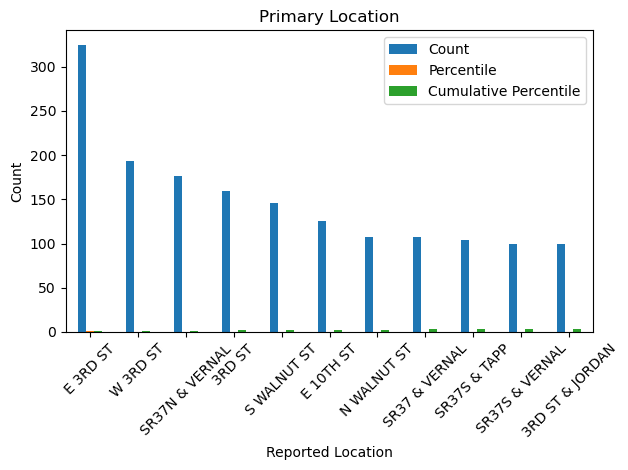

In [151]:
plt.figure(figsize=(20, 15))
df3.plot(kind='bar')
plt.xlabel('Reported Location')
plt.ylabel('Count')
plt.title('Primary Location')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [153]:
df2.head()

Count  Percentile  Cumulative Percentile
Reported_Location                                          
E 3RD ST             325    0.695768               0.695768
W 3RD ST             193    0.413179               1.108947
SR37N & VERNAL       177    0.378926               1.487872
3RD ST               159    0.340391               1.828263
S WALNUT ST          146    0.312560               2.140823

In [155]:
df3

Count  Percentile  Cumulative Percentile
Reported_Location                                          
E 3RD ST             325    0.695768               0.695768
W 3RD ST             193    0.413179               1.108947
SR37N & VERNAL       177    0.378926               1.487872
3RD ST               159    0.340391               1.828263
S WALNUT ST          146    0.312560               2.140823
E 10TH ST            126    0.269744               2.410567
N WALNUT ST          108    0.231209               2.641776
SR37 & VERNAL        108    0.231209               2.872985
SR37S & TAPP         104    0.222646               3.095631
SR37S & VERNAL       100    0.214082               3.309713
3RD ST & JORDAN      100    0.214082               3.523795

In [157]:
df1

NameError: name 'df1' is not defined

In [159]:
df

Weekend  Hour Collision Type         Injury Type  \
0      Weekday     0          2-Car   No injury/unknown   
1      Weekday  1500          2-Car   No injury/unknown   
2      Weekend  2300          2-Car  Non-incapacitating   
3      Weekend   900          2-Car  Non-incapacitating   
4      Weekend  1100          2-Car   No injury/unknown   
...        ...   ...            ...                 ...   
46706  Weekday  1800          2-Car   No injury/unknown   
46707  Weekday  1700          2-Car   No injury/unknown   
46708  Weekday   800          1-Car   No injury/unknown   
46709  Weekend   700          2-Car   No injury/unknown   
46710  Weekend  1700          2-Car  Non-incapacitating   

                              Primary Factor      Reported_Location  \
0      OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS   
1                      FOLLOWING TOO CLOSELY          2ND & COLLEGE   
2                  DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD   
3              FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS   
4              FAILURE TO YIELD RIGHT OF WAY                  W 3RD   
...                                      ...                    ...   
46706                       IMPROPER TURNING   EDUCATION LOT & ROSE   
46707                    IMPROPER LANE USAGE  DUNN & WHITE LOT WEST   
46708                           UNSAFE SPEED        RED OAK & SR446   
46709                         UNSAFE BACKING         NINETH & NORTH   
46710  OTHER (DRIVER) - EXPLAIN IN NARRATIVE      MONROW & THIRD ST   

        Latitude  Longitude        Date month_year  
0      39.159207 -86.525874  2015-01-05    2015-01  
1      39.161440 -86.534848  2015-01-06    2015-01  
2      39.149780 -86.568890  2015-01-06    2015-01  
3      39.165655 -86.575956  2015-01-07    2015-01  
4      39.164848 -86.579625  2015-01-07    2015-01  
...          ...        ...         ...        ...  
46706   0.000000   0.000000  2003-10-05    2003-10  
46707   0.000000   0.000000  2003-10-06    2003-10  
46708   0.000000   0.000000  2003-11-03    2003-11  
46709   0.000000   0.000000  2003-12-01    2003-12  
46710   0.000000   0.000000  2003-12-07    2003-12  

[46711 rows x 10 columns]

In [163]:
df["Injury Type"].value_counts()

Injury Type
No injury/unknown     36117
Non-incapacitating     9603
Incapacitating          900
Fatal                    91
Name: count, dtype: int64

In [187]:
df1 = df[df["Injury Type"]!='No injury/unknown']

In [191]:
df1["Injury Type"].value_counts()

Injury Type
Non-incapacitating    9603
Incapacitating         900
Fatal                   91
Name: count, dtype: int64

In [193]:
df1.head()

Weekend  Hour Collision Type         Injury Type  \
2   Weekend  2300          2-Car  Non-incapacitating   
3   Weekend   900          2-Car  Non-incapacitating   
13  Weekend  1300        3+ Cars      Incapacitating   
26  Weekday  1700          2-Car  Non-incapacitating   
33  Weekday  1200          2-Car  Non-incapacitating   

                           Primary Factor      Reported_Location   Latitude  \
2               DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3           FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
13              DISREGARD SIGNAL/REG SIGN   ROGERS & W PATTERSON  39.153790   
26                  FOLLOWING TOO CLOSELY  COUNTRY CLUB & ROGERS  39.136080   
33  SPEED TOO FAST FOR WEATHER CONDITIONS       DUNN & EAST 17TH  39.179002   

    Longitude        Date month_year  
2  -86.568890  2015-01-06    2015-01  
3  -86.575956  2015-01-07    2015-01  
13 -86.538750  2015-01-01    2015-01  
26 -86.538096  2015-01-02    2015-01  
33 -86.528326  2015-01-03    2015-01

In [195]:
df1.to_csv("gpt_data.csv")

Injury Type       Fatal  Incapacitating  Non-incapacitating
Collision Type                                             
1-Car                36             162                1526
2-Car                26             399                5875
3+ Cars               5             106                1069
Bus                   1               7                  66
Cyclist               0              40                 275
Moped/Motorcycle     20             130                 512
Pedestrian            3              56                 280


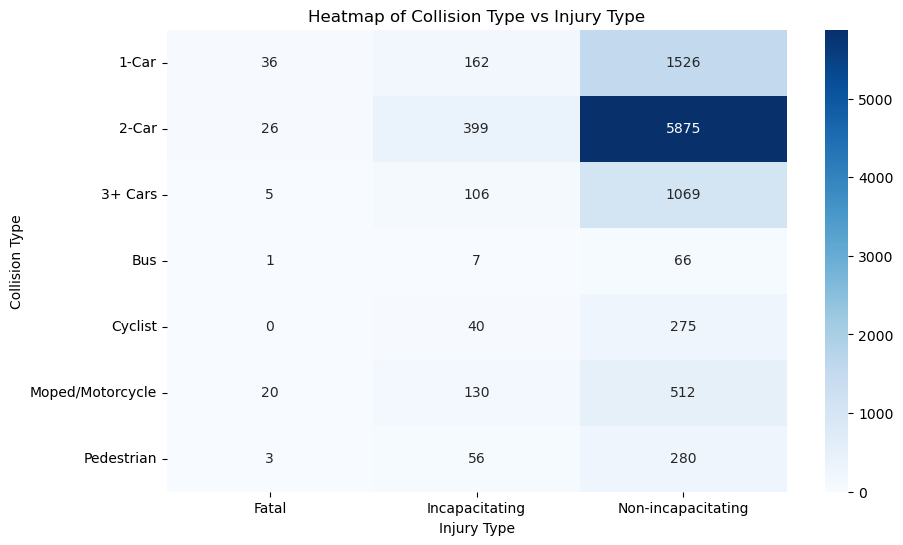

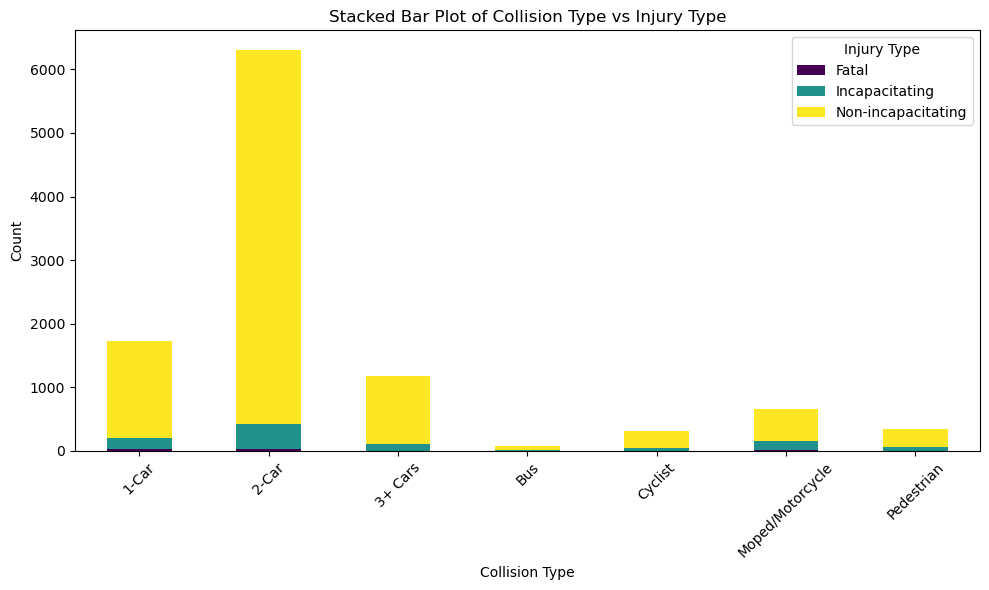

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a contingency table (crosstab)
collision_injury_crosstab = pd.crosstab(df1['Collision Type'], df1['Injury Type'])

# Display the crosstab
print(collision_injury_crosstab)

# Step 2: Plot a heatmap for the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(collision_injury_crosstab, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Collision Type vs Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Collision Type')
plt.show()

# Step 3: Plot a stacked bar plot
collision_injury_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Plot of Collision Type vs Injury Type')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()


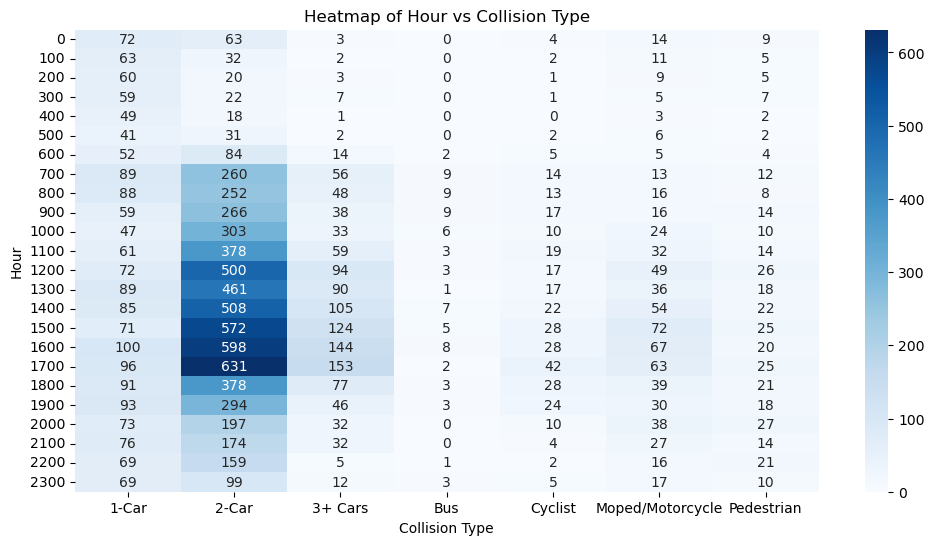

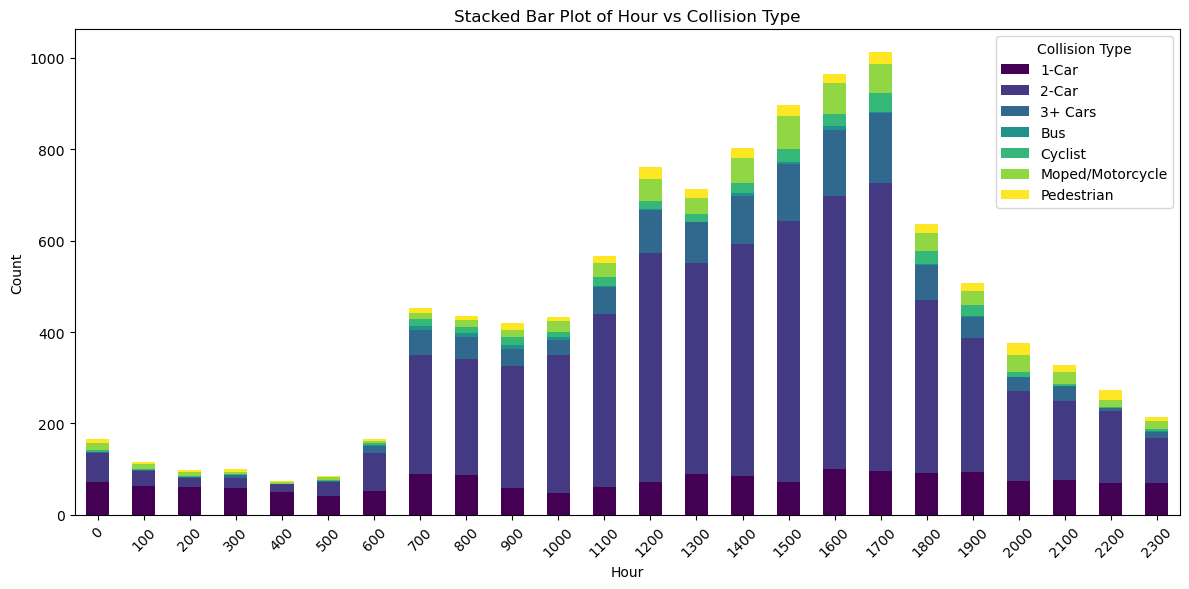

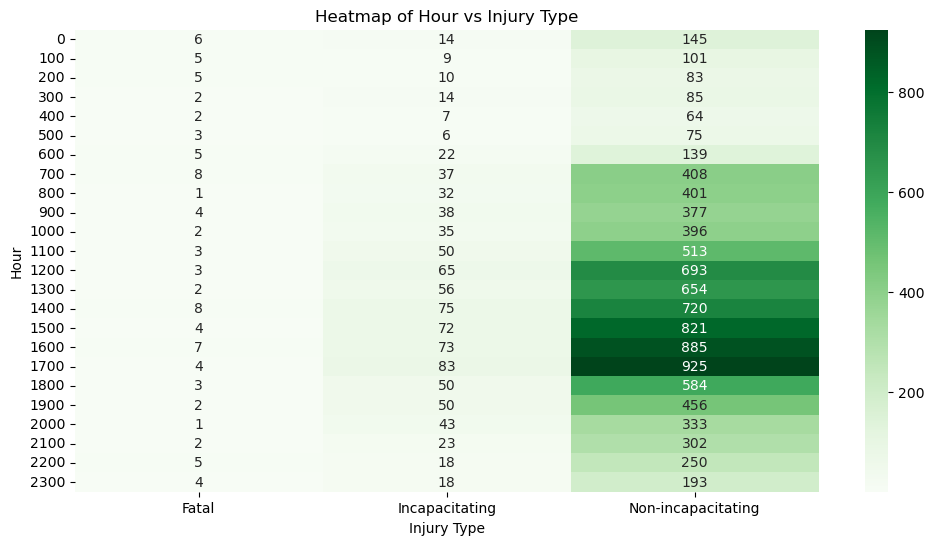

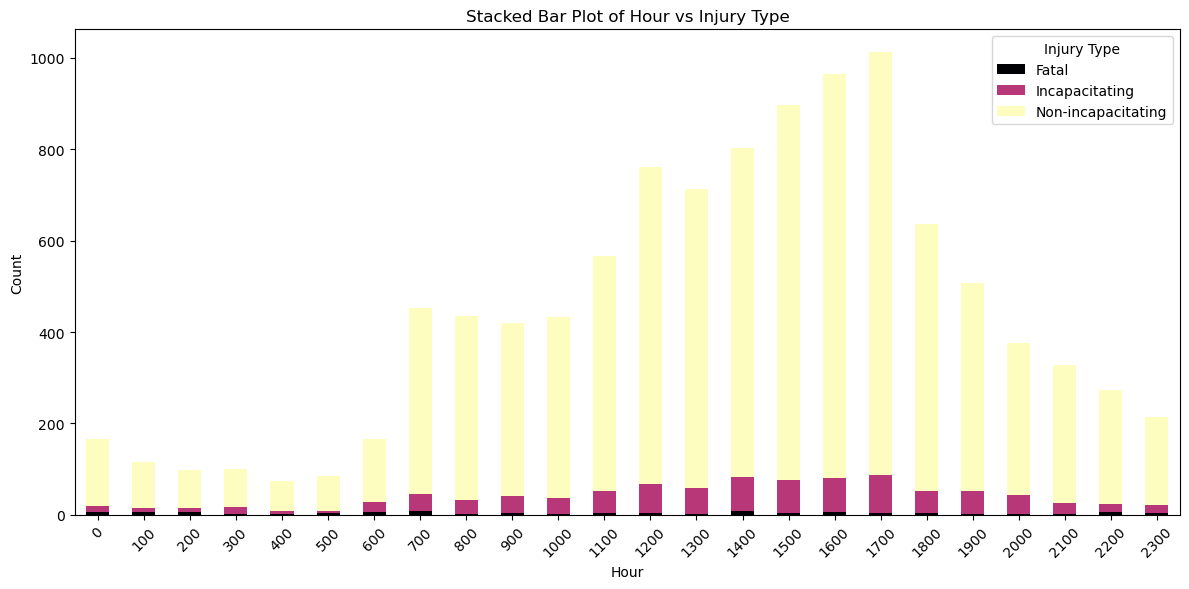

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already loaded with your data

# Step 1: Create crosstab for 'Hour' and 'Collision Type'
hour_collision_crosstab = pd.crosstab(df1['Hour'], df1['Collision Type'])

# Step 2: Create crosstab for 'Hour' and 'Injury Type'
hour_injury_crosstab = pd.crosstab(df1['Hour'], df1['Injury Type'])

# Plot Heatmap for 'Hour' vs 'Collision Type'
plt.figure(figsize=(12, 6))
sns.heatmap(hour_collision_crosstab, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Hour vs Collision Type')
plt.xlabel('Collision Type')
plt.ylabel('Hour')
plt.show()

# Plot Stacked Bar Plot for 'Hour' vs 'Collision Type'
hour_collision_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Plot of Hour vs Collision Type')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Collision Type')
plt.tight_layout()
plt.show()

# Plot Heatmap for 'Hour' vs 'Injury Type'
plt.figure(figsize=(12, 6))
sns.heatmap(hour_injury_crosstab, annot=True, cmap='Greens', fmt='g')
plt.title('Heatmap of Hour vs Injury Type')
plt.xlabel('Injury Type')
plt.ylabel('Hour')
plt.show()

# Plot Stacked Bar Plot for 'Hour' vs 'Injury Type'
hour_injury_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='magma')
plt.title('Stacked Bar Plot of Hour vs Injury Type')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()


In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Step 1: Create a crosstab for 'Hour' and 'Reported Location'
hour_location_crosstab = pd.crosstab(df1['Hour'], df1['Reported_Location'])

# Display the crosstab
print(hour_location_crosstab)


Reported_Location  0LD 37 NORTH RD & BETHEL LANE  1 & COLLEGE AVE AVE  \
Hour                                                                    
0                                              0                    0   
100                                            0                    0   
200                                            0                    0   
300                                            0                    0   
400                                            0                    0   
500                                            0                    0   
600                                            0                    0   
700                                            0                    0   
800                                            0                    0   
900                                            0                    0   
1000                                           0                    0   
1100                                           0   

In [213]:
df1.columns

Index(['Weekend', 'Hour', 'Collision Type', 'Injury Type', 'Primary Factor',
       'Reported_Location', 'Latitude', 'Longitude', 'Date', 'month_year'],
      dtype='object')

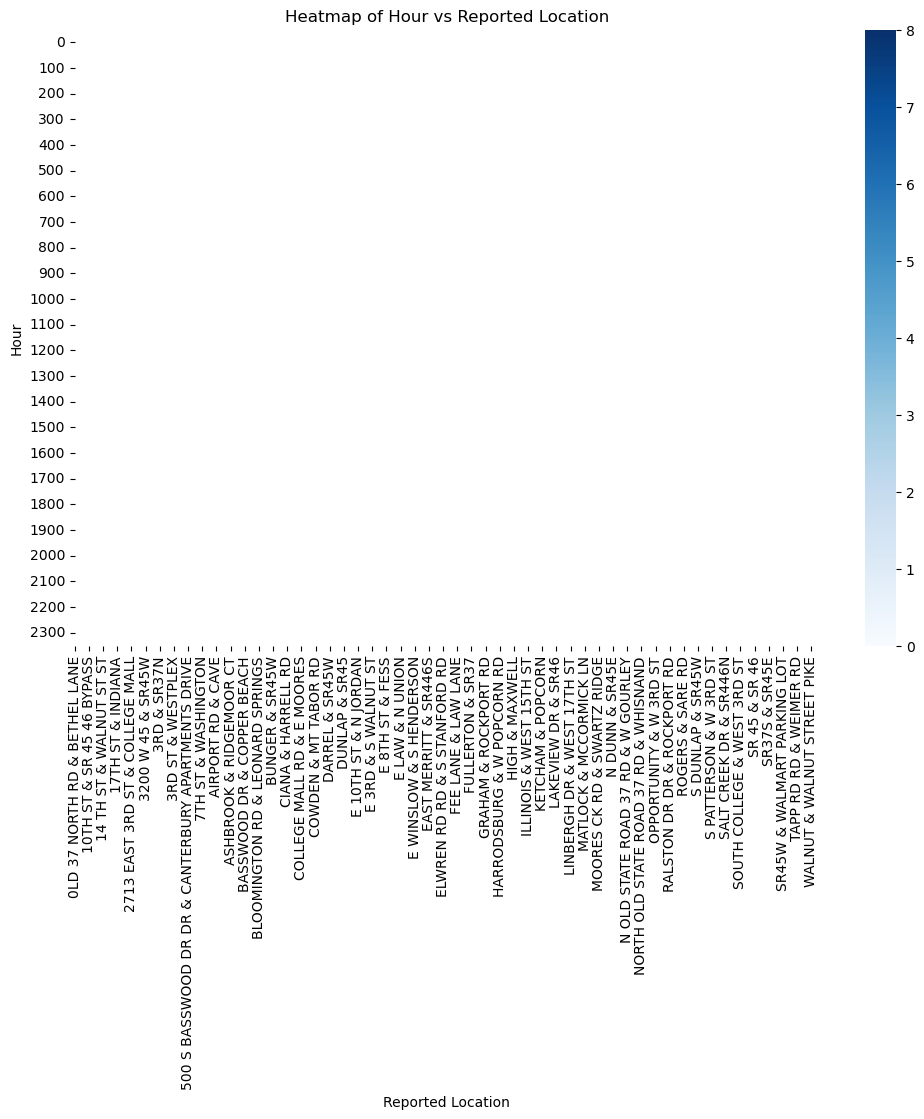

In [217]:
# Step 2: Plot a heatmap for 'Hour' vs 'Reported Location'
plt.figure(figsize=(12, 8))
sns.heatmap(hour_location_crosstab, cmap='Blues', annot=False, linewidths=.5)
plt.title('Heatmap of Hour vs Reported Location')
plt.xlabel('Reported Location')
plt.ylabel('Hour')
plt.show()


In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Step 1: Create a crosstab for 'Hour' and 'Weekend'
hour_weekend_crosstab = pd.crosstab(df1['Hour'], df1['Weekend'])

# Display the crosstab
print(hour_weekend_crosstab)


Weekend  Weekday  Weekend
Hour                     
0             93       72
100           70       45
200           53       45
300           42       59
400           43       30
500           61       23
600          138       28
700          415       38
800          382       52
900          334       85
1000         322      111
1100         425      141
1200         582      179
1300         535      177
1400         628      175
1500         731      166
1600         762      203
1700         858      154
1800         496      141
1900         352      156
2000         267      110
2100         206      121
2200         157      116
2300         127       88


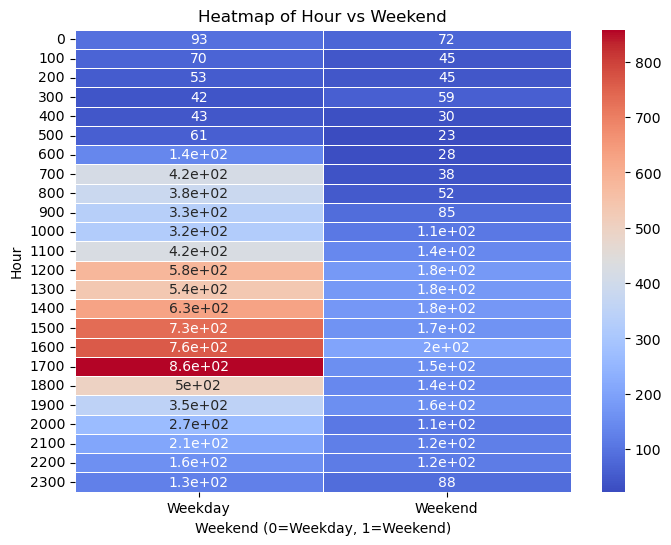

In [221]:
# Step 2: Plot a heatmap for 'Hour' vs 'Weekend'
plt.figure(figsize=(8, 6))
sns.heatmap(hour_weekend_crosstab, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Heatmap of Hour vs Weekend')
plt.xlabel('Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Hour')
plt.show()


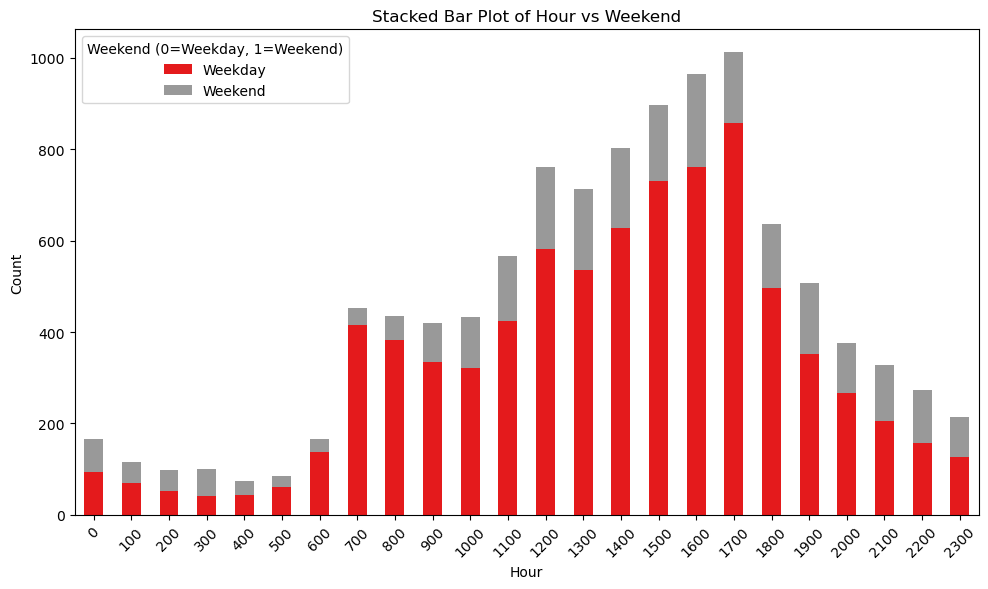

In [225]:
# Step 3: Plot a stacked bar plot for 'Hour' vs 'Weekend'
hour_weekend_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')
plt.title('Stacked Bar Plot of Hour vs Weekend')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Weekend (0=Weekday, 1=Weekend)')
plt.tight_layout()
plt.show()


In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Step 1: Create a crosstab for 'Primary Factor' and 'Reported Location'
factor_location_crosstab = pd.crosstab(df['Primary Factor'], df['Reported_Location'])

# Display the crosstab
print(factor_location_crosstab)


Reported_Location                         (NS ALLEY) E 3RD ST & S GRANT  \
Primary Factor                                                            
ANIMAL/OBJECT IN ROADWAY                                              0   
DISREGARD SIGNAL/REG SIGN                                             0   
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE                              0   
FAILURE TO YIELD RIGHT OF WAY                                         0   
FOLLOWING TOO CLOSELY                                                 0   
IMPROPER LANE USAGE                                                   0   
IMPROPER TURNING                                                      0   
LEFT OF CENTER                                                        0   
OTHER (DRIVER) - EXPLAIN IN NARRATIVE                                 0   
RAN OFF ROAD RIGHT                                                    0   
ROADWAY SURFACE CONDITION                                             0   
SPEED TOO FAST FOR WEATHE

In [235]:
import pandas as pd

# Assuming df is your dataframe

# Step 1: Group by 'Reported Location' and 'Primary Factor', and count the occurrences
grouped_df = df.groupby(['Reported_Location', 'Primary Factor']).size().reset_index(name='Count')

# Step 2: For each 'Reported Location', find the 'Primary Factor' with the highest count
max_factors_df = grouped_df.loc[grouped_df.groupby('Reported_Location')['Count'].idxmax()]

# Display the result
print(max_factors_df)


                   Reported_Location                         Primary Factor  \
0      (NS ALLEY) E 3RD ST & S GRANT                         UNSAFE BACKING   
1                         - & JORDAN                         UNSAFE BACKING   
2                            0000 DR  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   
3      0LD 37 NORTH RD & BETHEL LANE          FAILURE TO YIELD RIGHT OF WAY   
4                0LD SR37 & PINEWOOD  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   
...                              ...                                    ...   
28170            YELLOW WOOD LAKE RD                         UNSAFE BACKING   
28171                     YONKERS ST                         UNSAFE BACKING   
28172                       YOST AVE  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   
28174               ZIKES & ZIKES RD  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   
28175                       ZIKES RD                         UNSAFE BACKING   

       Count  
0          1  
1          1  
2     

KeyboardInterrupt: 

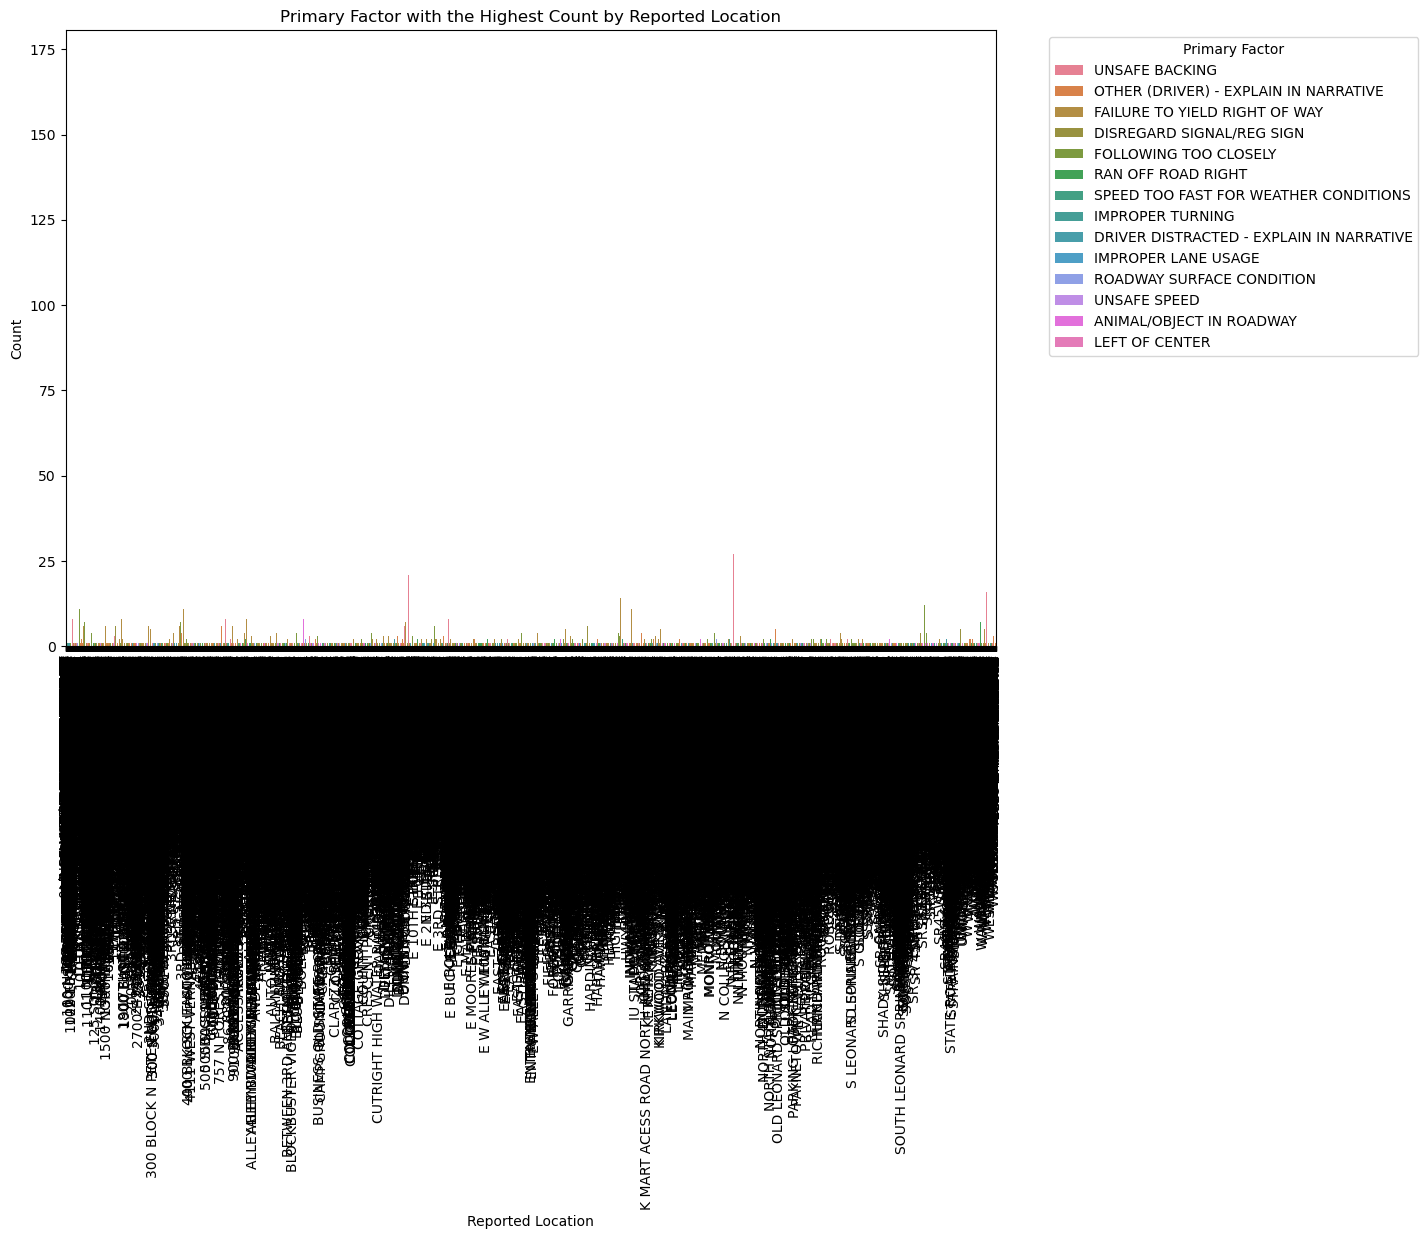

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Plot the data using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Reported_Location', y='Count', hue='Primary Factor', data=max_factors_df, dodge=False)
plt.title('Primary Factor with the Highest Count by Reported Location')
plt.xlabel('Reported Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Primary Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your dataframe

# Step 1: Group by 'Primary Factor' and 'Reported Location', and count the occurrences
grouped_df = df.groupby(['Primary Factor', 'Reported_Location']).size().reset_index(name='Count')

# Step 2: For each 'Primary Factor', find the 'Reported Location' with the highest count
max_locations_df = grouped_df.loc[grouped_df.groupby('Primary Factor')['Count'].idxmax()]

# Display the result
print(max_locations_df)
